In [3]:
import pandas as pd

## Open data 

In [4]:
path_to_data = "data/first instance decisions on applications.csv"
df = pd.read_csv(path_to_data, encoding="utf-8")
df.head()

,citizen,country,time,TOTAL,TOTAL_POS
0,AF,AT,2008Q1,185.0,150.0
1,AF,AT,2008Q2,245.0,185.0
2,AF,AT,2008Q3,260.0,180.0
3,AF,AT,2008Q4,255.0,140.0
4,AF,AT,2009Q1,395.0,165.0


In [5]:
# TODO

## Inspect data

In [6]:
# How big is the table?
df.shape # rows, columns

(27200, 5)

In [7]:
# What columns are there? 
df.columns 

Index([u'citizen', u'country', u'time', u'TOTAL', u'TOTAL_POS'], dtype='object')

In [8]:
# Inspect the top/bottom of table
df.head()

,citizen,country,time,TOTAL,TOTAL_POS
0,AF,AT,2008Q1,185.0,150.0
1,AF,AT,2008Q2,245.0,185.0
2,AF,AT,2008Q3,260.0,180.0
3,AF,AT,2008Q4,255.0,140.0
4,AF,AT,2009Q1,395.0,165.0


In [9]:
df.tail(10) # last 10 rows

,citizen,country,time,TOTAL,TOTAL_POS
27190,UNK,UK,2015Q3,0.0,0.0
27191,UNK,UK,2015Q4,0.0,0.0
27192,UNK,UK,2016Q1,5.0,0.0
27193,UNK,UK,2016Q2,0.0,0.0
27194,UNK,UK,2016Q3,0.0,0.0
27195,UNK,UK,2016Q4,5.0,0.0
27196,UNK,UK,2017Q1,0.0,0.0
27197,UNK,UK,2017Q2,5.0,5.0
27198,UNK,UK,2017Q3,0.0,0.0
27199,UNK,UK,2017Q4,NaN,NaN


In [10]:
# Inspect a given column
# - count: number of rows
# - unique: number of unique values
# - freq: max number of times values occur 
df["citizen"].describe()

count     27200
unique       20
top          NG
freq       1360
Name: citizen, dtype: object

In [11]:
# And inspect a column further
df["citizen"].unique()

array([u'AF', u'AL', u'BD', u'ER', u'EXT_EU28', u'GE', u'GM', u'GN',
       u'IQ', u'IR', u'NG', u'PK', u'RU', u'SN', u'SO', u'STLS', u'SY',
       u'TOTAL', u'TR', u'UNK'], dtype=object)

In [12]:
# Inspect a value columns
df["TOTAL"].describe()

count     25984.000000
mean       1281.850369
std       11745.083548
min           0.000000
25%           0.000000
50%          10.000000
75%         115.000000
max      361435.000000
Name: TOTAL, dtype: float64

## Filtering data

In [13]:
# What if I wanted to show applications in Sweden?
# Let's make a filter

# Step 1: Define the filter
is_sweden = df["country"] == "SE"
# Step 2: Apply the filter
df[is_sweden].head()


,citizen,country,time,TOTAL,TOTAL_POS
1160,AF,SE,2008Q1,190.0,50.0
1161,AF,SE,2008Q2,150.0,55.0
1162,AF,SE,2008Q3,150.0,85.0
1163,AF,SE,2008Q4,325.0,175.0
1164,AF,SE,2009Q1,245.0,120.0


In [14]:
# We can apply multiple filters at once

# 1. Define the filter
is_from_turkey = df["citizen"] == "TR"

# 2. Apply both filters at once
df[is_sweden & is_from_turkey].head()


,citizen,country,time,TOTAL,TOTAL_POS
25640,TR,SE,2008Q1,100.0,10.0
25641,TR,SE,2008Q2,65.0,0.0
25642,TR,SE,2008Q3,55.0,5.0
25643,TR,SE,2008Q4,65.0,5.0
25644,TR,SE,2009Q1,55.0,10.0


## Add computed columns

In [15]:
# What percent of applications got approved?
df["TOTAL_POS"] / df["TOTAL"]

0        0.810811
1        0.755102
2        0.692308
3        0.549020
4        0.417722
5        0.576471
6        0.534091
7        0.450980
8        0.371901
9        0.434783
10       0.541667
11       0.569767
12       0.686869
13       0.720000
14       0.538462
15       0.380682
16       0.273171
17       0.359756
18       0.403409
19       0.376471
20       0.365482
21       0.436464
22       0.472222
23       0.591667
24       0.888889
25       0.880597
26       0.926829
27       0.908397
28       0.864407
29       0.781955
           ...   
27170         NaN
27171         NaN
27172         NaN
27173         NaN
27174         NaN
27175         NaN
27176         NaN
27177         NaN
27178         NaN
27179         NaN
27180         NaN
27181         NaN
27182         NaN
27183         NaN
27184         NaN
27185    0.000000
27186    0.000000
27187         NaN
27188    0.000000
27189         NaN
27190         NaN
27191         NaN
27192    0.000000
27193         NaN
27194     

In [16]:
# Step 2: Add the column to the table
df.loc["approved_pct"] = df["TOTAL_POS"] / df["TOTAL"]
df.head()

,citizen,country,time,TOTAL,TOTAL_POS,approved_pct
0,AF,AT,2008Q1,185.0,150.0,0.810811
1,AF,AT,2008Q2,245.0,185.0,0.755102
2,AF,AT,2008Q3,260.0,180.0,0.692308
3,AF,AT,2008Q4,255.0,140.0,0.549020
4,AF,AT,2009Q1,395.0,165.0,0.417722


In [17]:
# What percent of the applications from Turkey got approved in each country

# Step 1. Make a filter for a given quarter
is_latest = df["time"] == "2017Q3"

# Step 2. Apply the filters and sort
df[is_from_turkey & is_latest].sort_values("approved_pct")

,citizen,country,time,TOTAL,TOTAL_POS,approved_pct
24998,TR,FI,2017Q3,5.0,0.0,0.000000
25678,TR,SE,2017Q3,45.0,0.0,0.000000
24598,TR,BG,2017Q3,5.0,0.0,0.000000
25518,TR,NO,2017Q3,10.0,0.0,0.000000
24718,TR,CZ,2017Q3,5.0,0.0,0.000000
25118,TR,HU,2017Q3,5.0,0.0,0.000000
24798,TR,DK,2017Q3,5.0,0.0,0.000000
24518,TR,AT,2017Q3,70.0,5.0,0.071429
25038,TR,FR,2017Q3,375.0,60.0,0.160000
25838,TR,UK,2017Q3,70.0,15.0,0.214286


## Aggregate data (pivot tables)


In [18]:
# How many applications came in each year?


In [19]:
# Step 1: Add a year column
df["year"] = df["time"].str[:4]
df.head()

,citizen,country,time,TOTAL,TOTAL_POS,approved_pct,year
0,AF,AT,2008Q1,185.0,150.0,0.810811,2008
1,AF,AT,2008Q2,245.0,185.0,0.755102,2008
2,AF,AT,2008Q3,260.0,180.0,0.692308,2008
3,AF,AT,2008Q4,255.0,140.0,0.549020,2008
4,AF,AT,2009Q1,395.0,165.0,0.417722,2009


In [20]:
# Step 2: Make the pivot table
# - index: "rows"
pd.pivot_table(df, index=["citizen", "country", "year"], aggfunc="sum")

TOTAL  TOTAL_POS  approved_pct
citizen country year                                  
AF      AT      2008    945.0      655.0      2.807240
                2009   1770.0      875.0      1.979263
                2010   2090.0      980.0      1.918118
                2011   2590.0     1420.0      2.326012
                2012   3575.0     1250.0      1.412807
                2013   3210.0     1450.0      1.865835
                2014   1535.0     1390.0      3.604712
                2015   2690.0     2110.0      3.153580
                2016   7035.0     3875.0      2.280573
                2017  17725.0     6805.0      1.638478
        BE      2008    865.0      205.0      0.944839
                2009   1245.0      280.0      0.913261
                2010   1415.0      665.0      1.929113
                2011   1530.0      820.0      2.141820
                2012   2530.0     1490.0      2.356295
                2013   2570.0     1435.0      2.238802
                2014   1980.0     1255.0      2.519315
                2015   1470.0      990.0      2.674390
                2016   2455.0     1485.0      2.380823
                2017   3740.0     2230.0      1.795570
        BG      2008     45.0       20.0      1.666667
                2009     50.0       30.0      2.500000
                2010     20.0        5.0      1.000000
                2011     45.0       30.0      3.500000
                2012     45.0       15.0      1.500000
                2013     40.0        5.0      0.333333
                2014    110.0       25.0      1.152381
                2015     95.0        5.0      0.166667
                2016    605.0        5.0      0.066667
                2017   1390.0       20.0      0.101697
...                       ...        ...           ...
UNK     SK      2008      0.0        0.0      0.000000
                2009      0.0        0.0      0.000000
                2010      0.0        0.0      0.000000
                2011      0.0        0.0      0.000000
                2012      0.0        0.0      0.000000
                2013      0.0        0.0      0.000000
                2014      0.0        0.0      0.000000
                2015      5.0        0.0      0.000000
                2016      0.0        0.0      0.000000
                2017      0.0        0.0      0.000000
        TOTAL   2008      0.0        0.0      0.000000
                2009      0.0        0.0      0.000000
                2010      0.0        0.0      0.000000
                2011   2795.0      695.0      1.014262
                2012   3045.0     1315.0      1.665022
                2013   2805.0     1215.0      1.718444
                2014   5225.0     3370.0      2.558355
                2015   8690.0     6775.0      3.091476
                2016  21095.0    16925.0      3.237017
                2017  11975.0     7105.0      1.764141
        UK      2008     10.0       10.0      2.000000
                2009      0.0        0.0      0.000000
                2010      5.0        0.0      0.000000
                2011      0.0        0.0      0.000000
                2012      0.0        0.0      0.000000
                2013      0.0        0.0      0.000000
                2014     10.0        0.0      0.000000
                2015      5.0        0.0      0.000000
                2016     10.0        0.0      0.000000
                2017      5.0        5.0      1.000000

[6800 rows x 3 columns]

In [21]:
# We can still add filters!
pd.pivot_table(df[is_from_turkey & is_sweden], index=["citizen", "country", "year"], aggfunc="sum")

TOTAL  TOTAL_POS  approved_pct
citizen country year                                
TR      SE      2008  285.0       20.0      0.267832
                2009  235.0       20.0      0.299465
                2010  205.0       15.0      0.257576
                2011  160.0       15.0      0.388889
                2012   95.0       25.0      0.935714
                2013  135.0       25.0      0.494949
                2014  120.0        5.0      0.142857
                2015  100.0        5.0      0.142857
                2016  220.0       10.0      0.183333
                2017  235.0       10.0      0.175000

## Visualize data

In [25]:
# You must run these two lines of code to make charts
%matplotlib inline
import matplotlib.pyplot as plt


In [26]:
# Step 1. Select the data to plot
df[is_from_turkey & is_sweden]

,citizen,country,time,TOTAL,TOTAL_POS,approved_pct,year
25640,TR,SE,2008Q1,100.0,10.0,0.100000,2008
25641,TR,SE,2008Q2,65.0,0.0,0.000000,2008
25642,TR,SE,2008Q3,55.0,5.0,0.090909,2008
25643,TR,SE,2008Q4,65.0,5.0,0.076923,2008
25644,TR,SE,2009Q1,55.0,10.0,0.181818,2009
25645,TR,SE,2009Q2,50.0,0.0,0.000000,2009
25646,TR,SE,2009Q3,45.0,0.0,0.000000,2009
25647,TR,SE,2009Q4,85.0,10.0,0.117647,2009
25648,TR,SE,2010Q1,55.0,5.0,0.090909,2010
25649,TR,SE,2010Q2,40.0,0.0,0.000000,2010


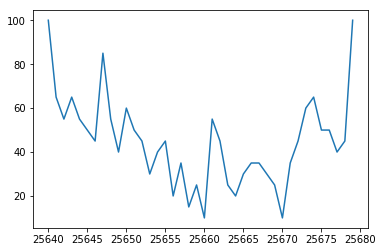

In [27]:
# Step 2. Select column and plot
df[is_from_turkey & is_sweden]["TOTAL"].plot()

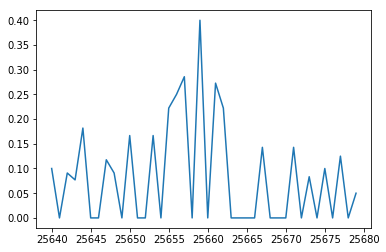

In [28]:
df[is_from_turkey & is_sweden]["approved_pct"].plot()

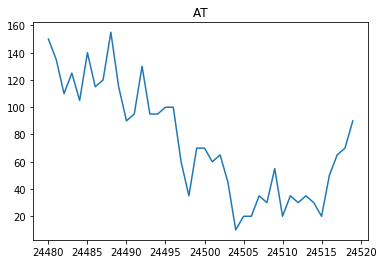

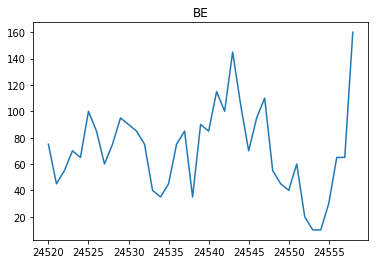

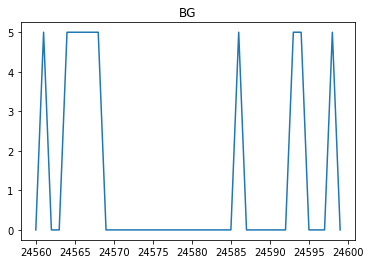

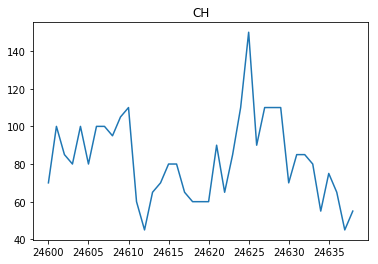

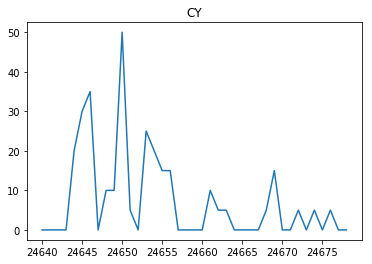

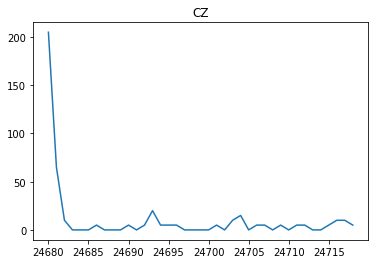

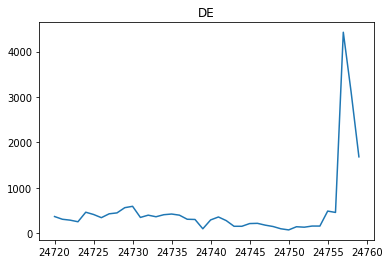

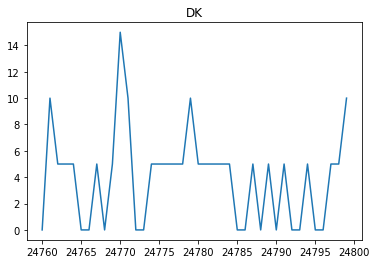

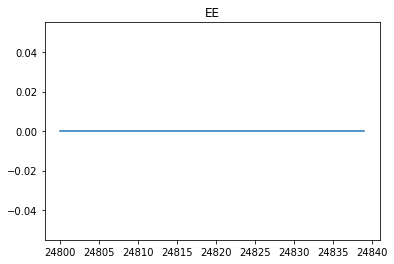

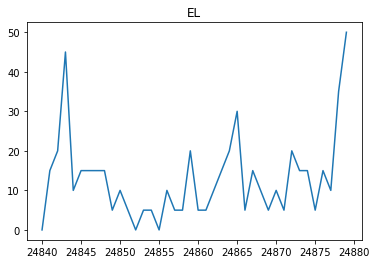

In [30]:
# Demo only:
i = 0
for country, country_df in df[is_from_turkey].sort_values("time").groupby("country"):
    country_df["TOTAL"].plot(title=country)
    plt.show()
    i += 1
    if i == 10:
        break